<a href="https://colab.research.google.com/github/the9kim/Machine-Deep-Learning-Practice/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preparation

In [93]:
import numpy as np
from sklearn.model_selection import train_test_split

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# Preparing input and target data using Numpy
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

# Spliting input data into training and target data using Scikit learn library
# Stratify a dataset means to divide it into homogeneous subgroups before performing various analyses or sampling.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)


(36, 2) (13, 2)
(36,) (13,)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]



# 2-1 Trainig a K-NN Model without Data Preprocessing

In [94]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

[0.]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]
[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]] [[1. 0. 0. 0. 0.]]


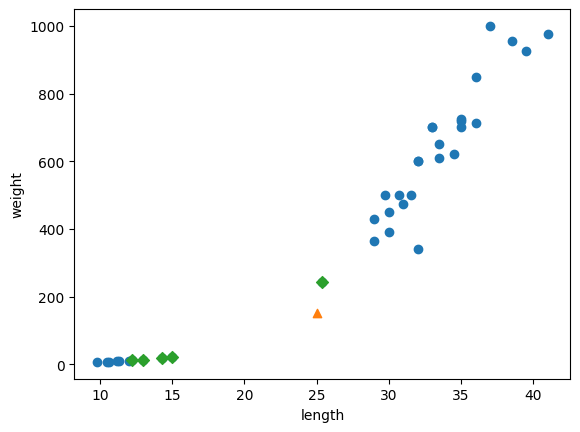

In [95]:
import matplotlib.pyplot as plt

print(kn.predict([[25, 150]]))

distance, indexes = kn.kneighbors([[25, 150]])
print(distance, indexes)
print(train_input[indexes], train_target[indexes])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()




#2-2 Training a K-NN model with Data Preprocessing


[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


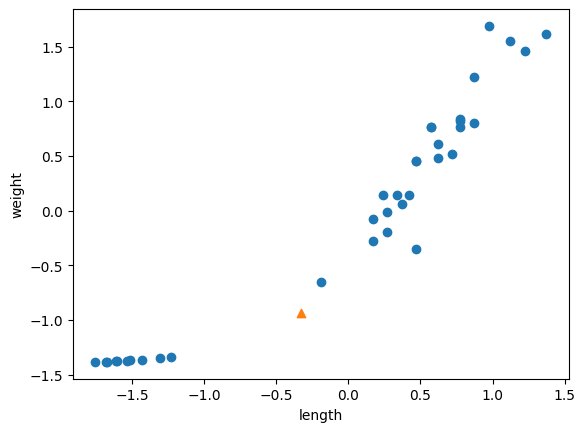

In [96]:
# Using the Standard score to solve a problem where two feature have different scales

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean, std)

# Calculating the standard score easily using numpy broadcasting
train_scaled = (train_input - mean) / std
new_point = ([24, 150] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new_point[0], new_point[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [97]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)

1.0

In [98]:
kn.predict([new_point])

array([1.])

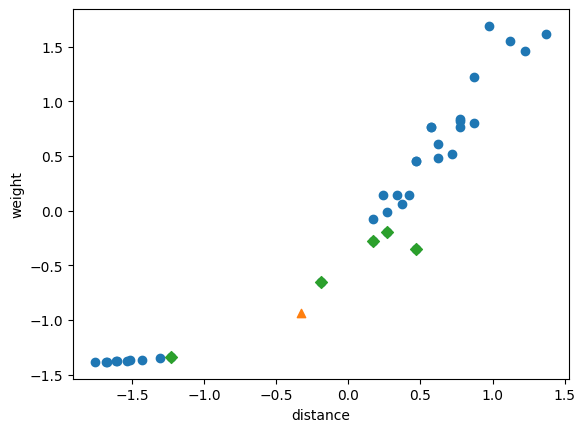

In [99]:
distance, indexes = kn.kneighbors([new_point])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new_point[0], new_point[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('distance')
plt.ylabel('weight')
plt.show()